In [ ]:
import pandas as pd
df = pd.read_csv("../../data/W1/mtcars.csv")

## DataFrame methods 사용하여 데이터셋 출력

### head, tail

In [92]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [93]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


### shape

In [94]:
df.shape

(32, 12)

### columns

In [95]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [96]:
df = df.rename(columns = {"Unnamed: 0": "model"})

### info, dtypes

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [98]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

### describe

In [99]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## gear, transmission에 몇가지 값이 있는지 출력

In [100]:
df['gear'].nunique()

3

In [101]:
df['am'].nunique()

2

## gear, transmission 경우의 수 조합별로 구분

### 결과값 출력

In [102]:
group = df.groupby(['gear', 'am']).size()
print(group)

gear  am
3     0     15
4     0      4
      1      8
5     1      5
dtype: int64


### pandas.crosstab method 사용

In [110]:
ct = pd.crosstab(df['gear'], df['am'])
print(ct)

am     0  1
gear       
3     15  0
4      4  8
5      0  5


### 결과값 바 그래프로 그리기 위한 전처리

In [103]:
result = group.reset_index(name='count')
print(result)


   gear  am  count
0     3   0     15
1     4   0      4
2     4   1      8
3     5   1      5


groupby().size()의 결과는 pandas.Series이며, 그룹 키(gear, am)는 MultiIndex 형태로 저장.

MultiIndex는 tuple로 구성되어 있어 matplotlib의 bar() 함수에서 내부 산술 연산 과정 중 오류가 발생함

따라서 reset_index(name=...)를 사용해 MultiIndex를 컬럼으로 변환하고 Series 값을 컬럼으로 명시하여 DataFrame 형태로 처리.

In [104]:
result['label'] = result.apply(
    lambda row: f"({row['gear']}, {row['am']})",
    axis=1
)
print(result)

   gear  am  count   label
0     3   0     15  (3, 0)
1     4   0      4  (4, 0)
2     4   1      8  (4, 1)
3     5   1      5  (5, 1)


label 컬럼을 새로 만들지 않으면 조합 컬럼에 대해 tuple로 x축 인식함
이 경우 변환과정에서 오류 발생
(gear, am) 조합을 하나의 범주형 x축으로 사용하기 위해 문자열 형태의 label 컬럼을 생성하면 matplotlib에서 오류 없이 시각화가 가능

### 결과값 바 그래프로 그림

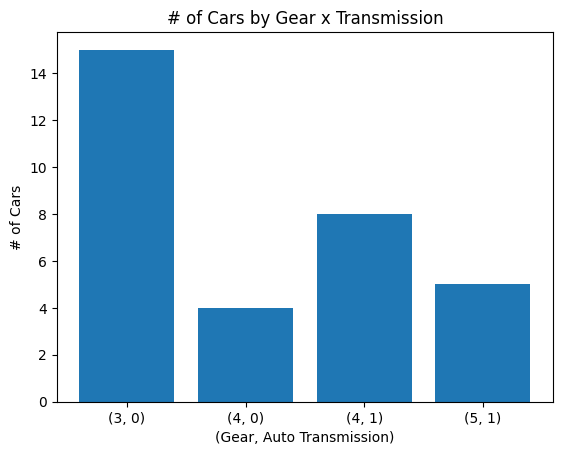

In [105]:
import matplotlib.pyplot as plt
plt.bar(result['label'], result['count'])
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')

plt.show()

## 모든 features의 히스토그램

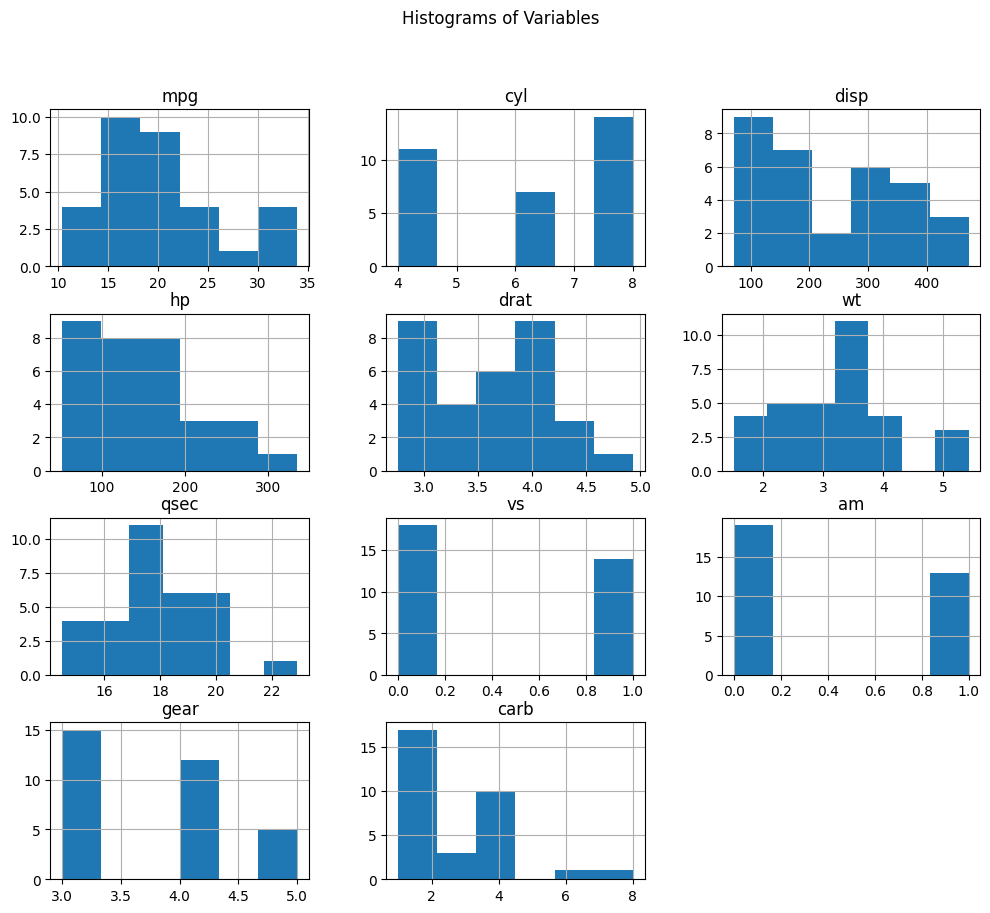

In [106]:
df.hist(bins='auto', figsize=(12, 10))
plt.suptitle("Histograms of Variables")
plt.show()

## Cylinder와 HorsePower 간의 상관 관계 scatter 차트

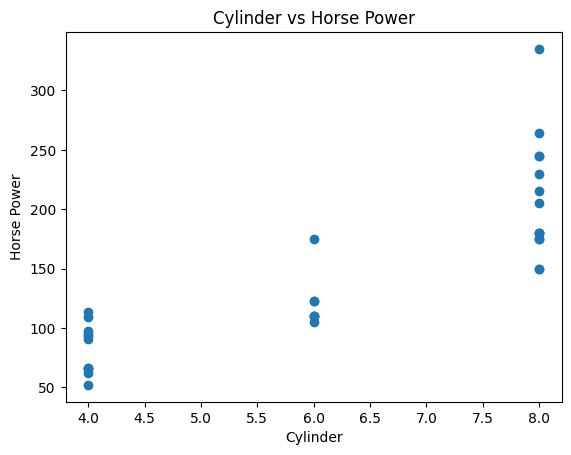

In [107]:
plt.scatter(df['cyl'], df['hp'])

plt.title("Cylinder vs Horse Power")
plt.xlabel("Cylinder")
plt.ylabel("Horse Power")

plt.show()

## MPG와 HorsePower간의 상관 관계 scatter 차트

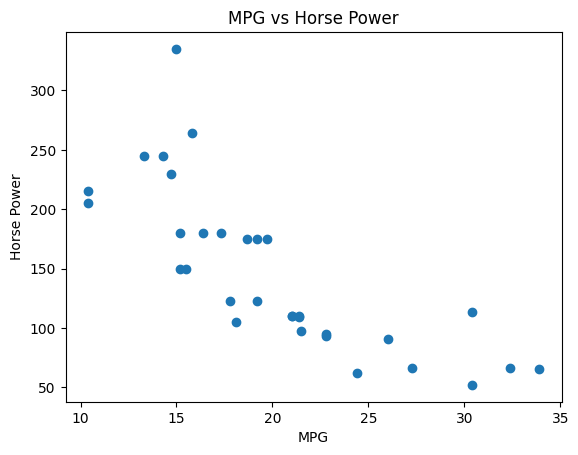

In [111]:
plt.scatter(df['mpg'], df['hp'])

plt.title("MPG vs Horse Power")
plt.xlabel("MPG")
plt.ylabel("Horse Power")

plt.show()

## 각 변수들 간의 상관계수 표

In [109]:
corr_matrix = df.select_dtypes(include='number').corr()
print(corr_matrix)

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

## 상관 계수 가장 높은 것 추출

In [112]:
# 상관계수 행렬을 1차원으로 펼침
corr_pairs = corr_matrix.unstack()

In [113]:
# 자기 자신 제거
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0)
                        != corr_pairs.index.get_level_values(1)]

In [114]:
# 절댓값 기준으로 정렬
corr_pairs = corr_pairs.abs().sort_values(ascending=False)

In [115]:
# 가장 높은 상관관계 변수 확인
print(corr_pairs.head(5))

cyl   disp    0.902033
disp  cyl     0.902033
wt    disp    0.887980
disp  wt      0.887980
mpg   wt      0.867659
dtype: float64
